Eigenfaces code adapted from http://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html

In [11]:
RED  = '#C82506'
BLUE = '#0365C0'
GREEN = '#00882B'
ORANGE = '#DE6A10'
PURPLE = '#773F9B'
YELLOW = '#DCBD23'

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

def clean(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
def ca(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', top='off', right='off', left='off',
    labelbottom='off', labelleft='off') # labels along the bottom edge are off
    
def center(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom='off', labelleft='off')
    
    ax.set_aspect('equal')

In [1]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/Peter/scikit_learn_data


(400, 4096)

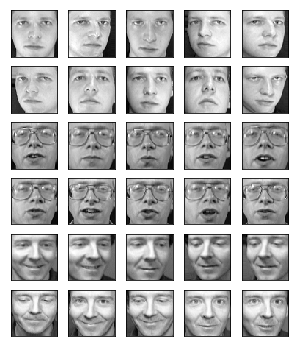

In [244]:

fig = plt.figure(figsize=(5, 6))
# plot several images
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.gray)
    
plt.savefig('faces.pdf')

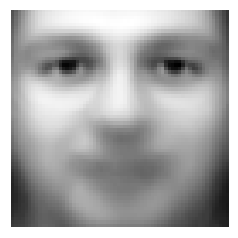

In [268]:
faces.images[0].shape

plt.imshow(faces.data.mean(axis=0).reshape((64, 64)), cmap=plt.cm.gray)
ca()

plt.savefig('mean-face.pdf')

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [95]:
d = (faces.data - faces.data.mean(axis=0)).T
cov = d.T.dot(d) # the "outer" covariance
cov.shape

(400, 400)

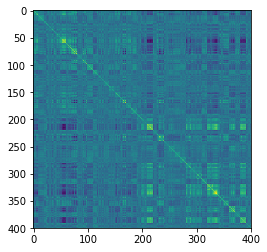

In [96]:
plt.imshow(cov, cmap=plt.cm.viridis)


In [97]:
from numpy.linalg import svd, norm

u, s, vh = svd(cov)



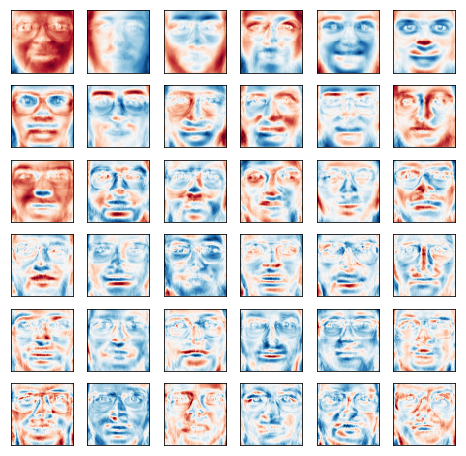

In [246]:
u.shape
eigs = d.dot(u)

eigs = eigs / norm(eigs, axis=0)

eigs.shape

fig = plt.figure(figsize=(8, 8))

for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(eigs[:, i].reshape((64,64)), cmap=plt.cm.RdBu)
    
plt.savefig('eigenvectors.pdf')

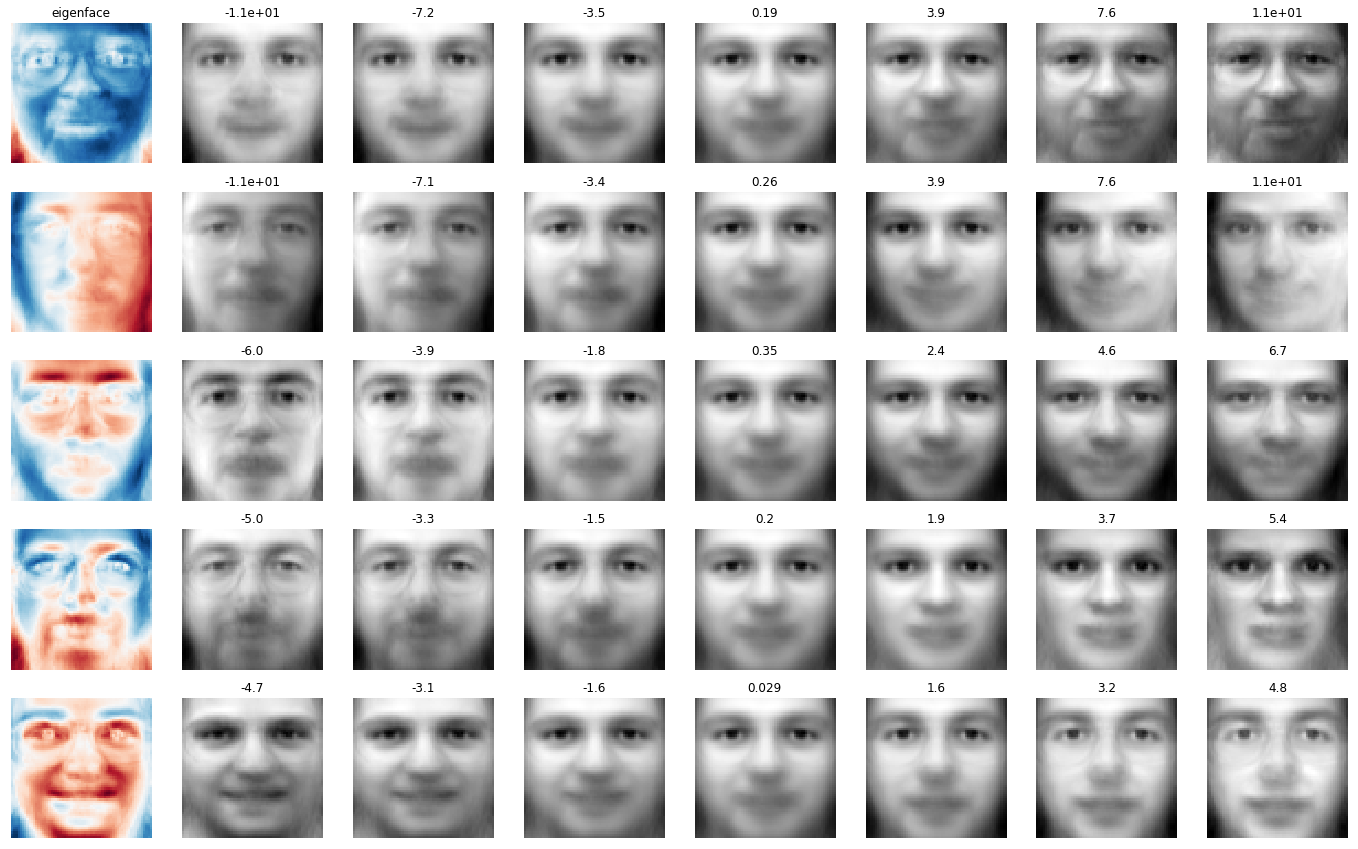

In [247]:
# starting with the mean face

mean_face = faces.data.mean(axis=0)

rows, steps = 5, 7
scale = 3.0
fig = plt.figure(figsize=((steps+1)*scale, rows*scale))

for ef in range(rows):

    ineb = eigs.T.dot(d)
    fr, to = ineb[ef,:].min(), ineb[ef,:].max()

    ax = fig.add_subplot(rows, steps+1, ef * (steps+1) + 1)
    ca(ax)
    ax.imshow(eigs[:, ef].reshape((64,64)), cmap=plt.cm.RdBu_r)
    if(ef==0):
        ax.set_title('eigenface')


    for i, v in enumerate(np.linspace(fr, to, steps)):
        ax = fig.add_subplot(rows, steps+1, ef * (steps+1) + 2 + i)
        face = mean_face + v * eigs[:, ef]
        ax.imshow(face.reshape((64,64)), cmap=plt.cm.gray)
        ax.set_title('{:.02}'.format(v))
        ca(ax)

plt.savefig('mean-tweak.pdf')
    

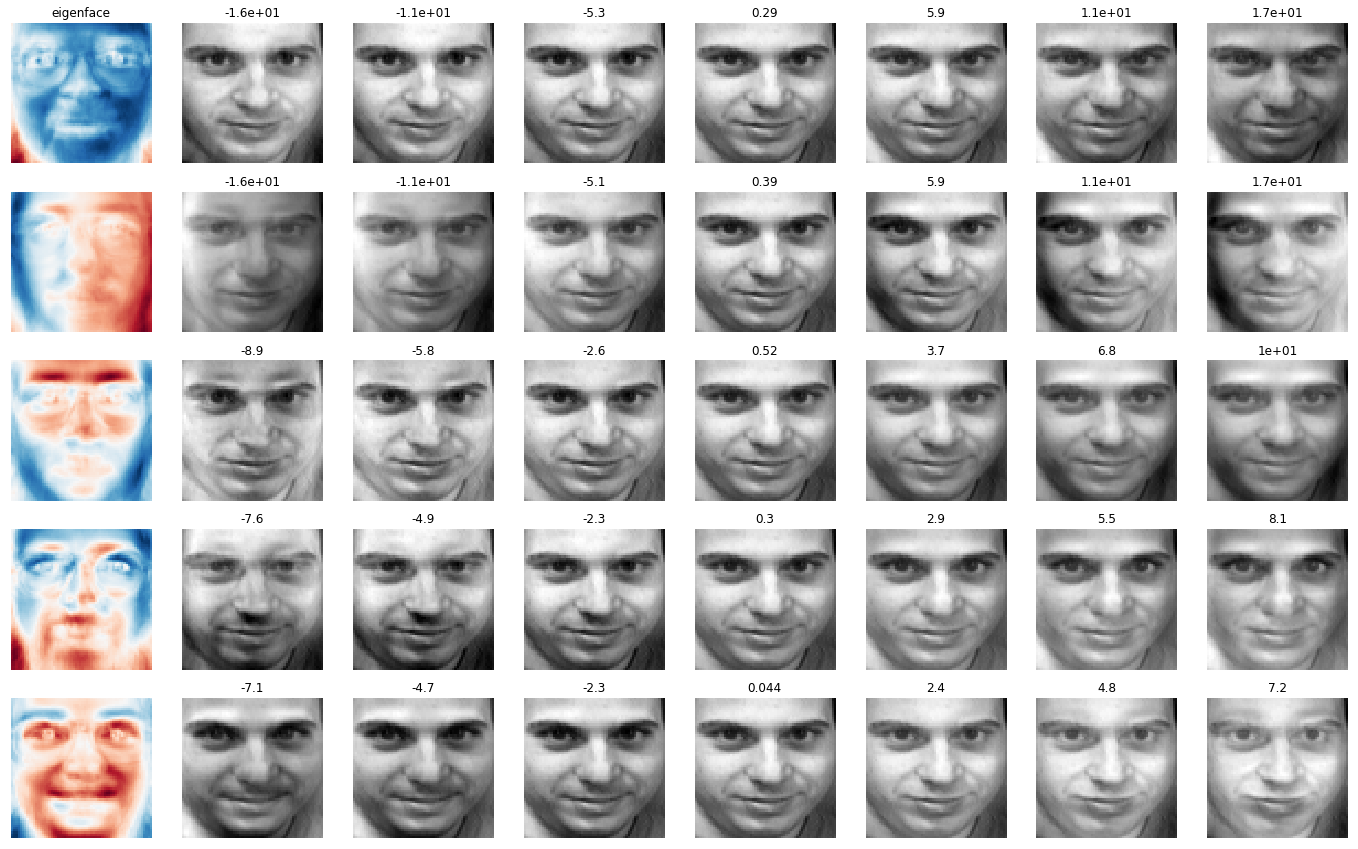

In [250]:
# starting with a random face
random_face = faces.data[82, :]
mult = 1.5

rows, steps = 5, 7
scale = 3.0
fig = plt.figure(figsize=((steps+1)*scale, rows*scale))

for ef in range(rows):

    ineb = eigs.T.dot(d)
    fr, to = ineb[ef,:].min(), ineb[ef,:].max()

    ax = fig.add_subplot(rows, steps+1, ef * (steps+1) + 1)
    ca(ax)
    ax.imshow(eigs[:, ef].reshape((64,64)), cmap=plt.cm.RdBu_r)
    if(ef==0):
        ax.set_title('eigenface')

    for i, v in enumerate(np.linspace(fr, to, steps)):
        ax = fig.add_subplot(rows, steps+1, ef * (steps+1) + 2 + i)
        face = random_face + v * mult * eigs[:, ef]
        ax.imshow(face.reshape((64,64)), cmap=plt.cm.gray)
        ax.set_title('{:.02}'.format(v*mult))
        ca(ax)
        
plt.savefig('rando-tweak.pdf')


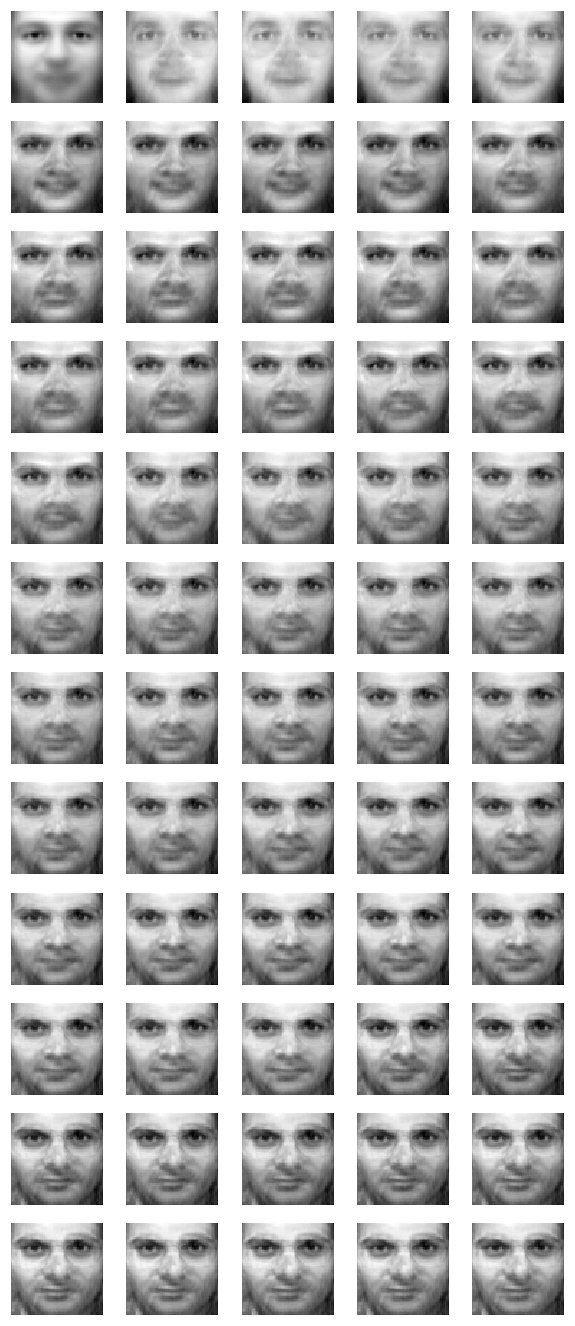

In [262]:
ineb = eigs.T.dot(faces.data[82, :])

face = faces.data.mean(axis=0)

fig = plt.figure(figsize=(10, 24))

for i in range(60):
    
    ax = fig.add_subplot(12, 5, 1 + i)
    
    ax.imshow(face.reshape((64,64)), cmap=plt.cm.gray)
    ca(ax)
    
    eigenvector = eigs[:, i]
    step = ineb[i]
    
    face += step * eigenvector

plt.savefig('construction.pdf')

[-1.  1. -1. -1. -1.  1. -1. -1.  1. -1.]


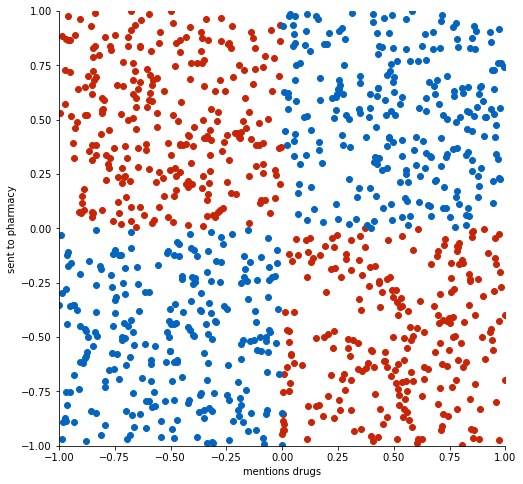

In [264]:
x = np.random.rand(1000, 2)* 2.0 - 1.0
x.shape
y = np.sign(x[:, 0] * x[:, 1])
print(y[:10])

xp = x[y < 0]
xn = x[y > 0]

plt.figure(figsize=(8, 8))

plt.scatter(xp[:, 0], xp[:,1], color=RED)
plt.scatter(xn[:, 0], xn[:,1], color=BLUE)

plt.xlabel('mentions drugs')
plt.ylabel('sent to pharmacy')

plt.xlim((-1, 1))
plt.ylim((-1, 1))

clean()

plt.savefig('xor.pdf')

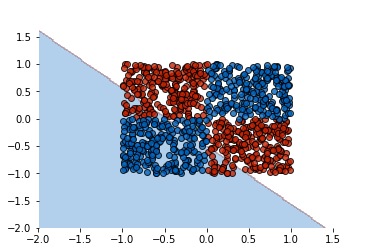

In [174]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

lin = SVC(kernel='linear')
lin.fit(x, y)

ax = plot_decision_regions(x, y.astype(int), clf=lin, res=0.02, legend=None, markers='oo', colors=RED+','+BLUE);



In [265]:
xplus = np.concatenate([x, (x[:, 0] * x[:, 1]).reshape(-1, 1)], axis=1)

# np.savetxt('xx.csv', xx, delimiter=',')

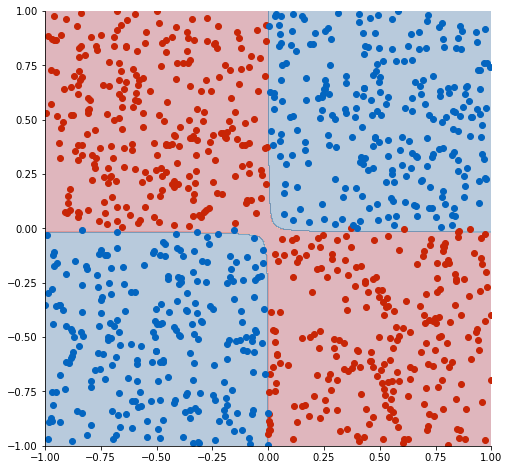

In [267]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

lin = SVC(kernel='linear')
lin.fit(xplus, y)

h = 500 # step nums in the mesh

a_min, a_max = -1.0, 1.0
h_min, h_max = -1.0, 1.0

xx, yy = np.meshgrid(np.arange(a_min, a_max, (a_max - a_min)/h),
                     np.arange(h_min, h_max, (h_max - h_min)/h))

xr = xx.ravel()
yr = yy.ravel() 
xyplus = np.column_stack((xr, yr, xr*yr));

zz = lin.predict(xyplus)
zz = zz.reshape(xx.shape)

plt.figure(figsize=(8, 8))

plt.contourf(xx, yy, zz, cmap='RdBu', alpha=0.3)
plt.scatter(xp[:, 0], xp[:,1], color=RED)
plt.scatter(xn[:, 0], xn[:,1], color=BLUE)

plt.xlim((-1, 1))
plt.ylim((-1, 1))

clean()
plt.savefig('xor-solved.pdf')

In [179]:
female = pd.read_csv('../11 Introduction/ANSUR II FEMALE Public.csv')
male = pd.read_csv('../11 Introduction/ANSUR II MALE Public.csv')
human = pd.concat([male, female]).sample(frac=1)

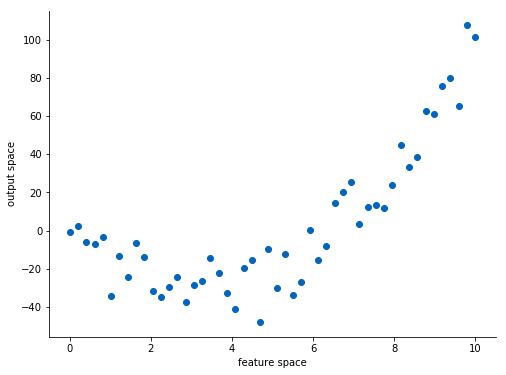

In [222]:
plt.figure(figsize=(8, 6))

n = 50
xr = np.linspace(0, 10, n) 
yr = 3 * xr ** 2 -20 *xr + np.random.randn(n)* 10

plt.figure(figsize=(8, 6))

plt.scatter(xr, yr, color=BLUE)

plt.xlabel('feature space')
plt.ylabel('output space')

clean()

plt.savefig('regression-problem.pdf')

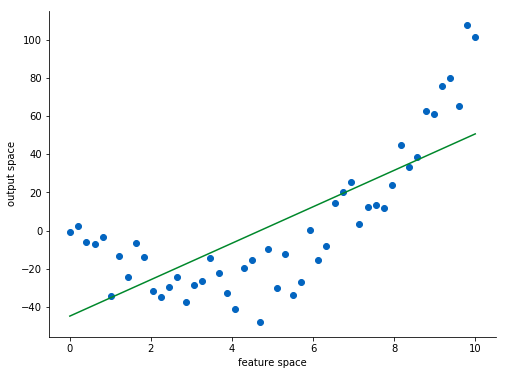

In [223]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()
linr.fit(xr.reshape(-1, 1), yr)

ypred = linr.predict(xr.reshape(-1, 1))

plt.figure(figsize=(8, 6))

plt.scatter(xr, yr, color=BLUE)
plt.plot(xr, ypred, color=GREEN)

plt.xlabel('feature space')
plt.ylabel('output space')

clean()

plt.savefig('regression-problem-linear.pdf')

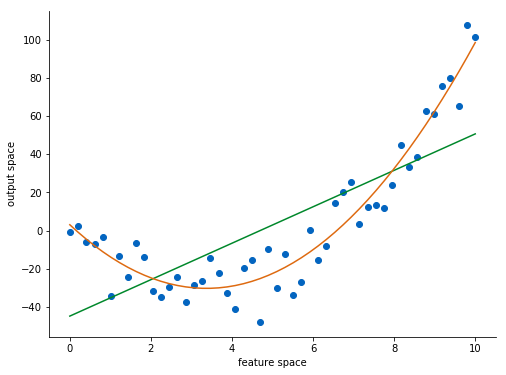

In [224]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()

xr2 = np.column_stack((xr, xr **2))
linr.fit(xr2, yr)

ypred2 = linr.predict(xr2)

plt.figure(figsize=(8, 6))

plt.scatter(xr, yr, color=BLUE)
plt.plot(xr, ypred, color=GREEN)
plt.plot(xr, ypred2, color=ORANGE)

plt.xlabel('feature space')
plt.ylabel('output space')

clean()

plt.savefig('regression-problem-cross.pdf')

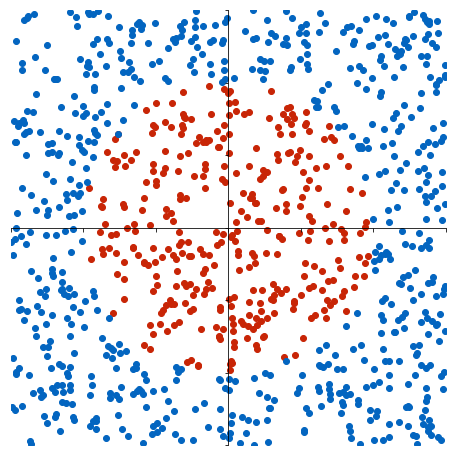

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.rand(1000, 2)* 3.0 - 1.5
y = np.sign(np.sqrt(x[:, 0]**2 + x[:, 1]**2) - 1.0)

xp = x[y < 0]
xn = x[y > 0]

plt.figure(figsize=(8, 8))

plt.scatter(xp[:, 0], xp[:,1], color=RED)
plt.scatter(xn[:, 0], xn[:,1], color=BLUE)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

clean()
center()

plt.savefig('circle.pdf')

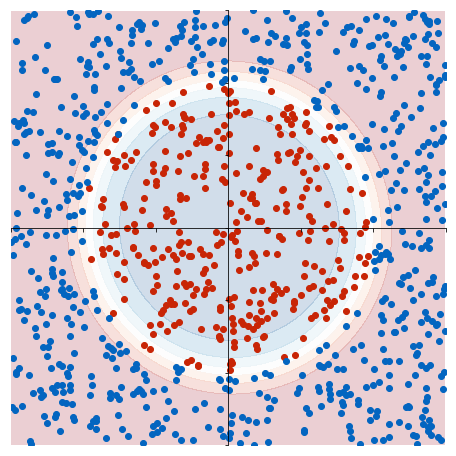

In [21]:
# from sklearn.svm import SVC
from sklearn.linear_model.logistic import LogisticRegression
from mlxtend.plotting import plot_decision_regions

xplus = np.column_stack((x[:, 0], x[:, 1], x[:,0]**2, x[:,1]**2, x[:,0] * x[:,1]))

lin = LogisticRegression()
lin.fit(xplus, y)

h = 500 # step nums in the mesh

a_min, a_max = -1.5, 1.5
h_min, h_max = -1.5, 1.5

xx, yy = np.meshgrid(np.arange(a_min, a_max, (a_max - a_min)/h),
                     np.arange(h_min, h_max, (h_max - h_min)/h))

xr = xx.ravel()
yr = yy.ravel() 

xyplus = xplus = np.column_stack((xr, yr, xr**2, yr**2, xr*yr))

zz = lin.predict_proba(xyplus)
zz = zz[:,0]
zz = zz.reshape(xx.shape)

plt.figure(figsize=(8, 8))

plt.contourf(xx, yy, zz, cmap='RdBu', alpha=0.2)
plt.scatter(xp[:, 0], xp[:,1], color=RED)
plt.scatter(xn[:, 0], xn[:,1], color=BLUE)

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))

clean()
center()

plt.savefig('circle-solved.pdf')